# Tensorflow Demo in Sagemaker Studio Lab

[![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/adrianusk/sagemaker-studiolab-demo/blob/master/tensorflow%20mnist.ipynb)

This notebook works with tf-plt kernel.  
First Lets import tensorflow and mnist dataset

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

Load training and test data

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Import plotting library to show the image

In [3]:
import matplotlib.pyplot as plt

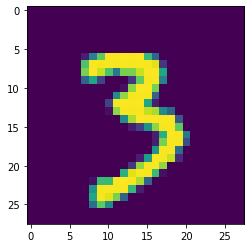

In [4]:
plt.imshow(x_test[30])

Define keras model

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

Compile then train and evaluate the model

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2993 - accuracy: 0.9112
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1448 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1066 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0873 - accuracy: 0.9731
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9797


[0.07191351056098938, 0.9797000288963318]

In [8]:
import numpy as np

In [9]:
np.argmax(model.predict(np.reshape(x_test[30],(1,28,28))))

3

In [10]:
!nvidia-smi

Sat Jul  2 02:32:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   39C    P0    26W /  70W |  14228MiB / 15109MiB |     11%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
stepping	: 7
microcode	: 0x500320a
cpu MHz		: 3103.154
cache size	: 36608 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single pti fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves ida arat pku ospke avx512_vnni
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf

In [1]:
!free

              total        used        free      shared  buff/cache   available
Mem:       16233868     1433392     4502400         592    10298076    14514992
Swap:             0           0           0
